In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import sklearn
%matplotlib inline

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head() # Head table for exploration
list(df.columns) # Column names

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [5]:
# Feature selection
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


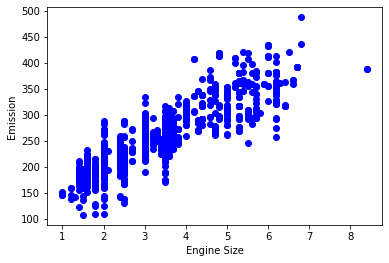

In [7]:
# Plotting engine size vs co2 missions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [15]:
# Dividing data into mutually exclusive test and train datasets
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk]

In [25]:
train.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [27]:
# Polynomial Regression 
## Relationship between independent variable x and dependent variable y is modeled as an nth degree polynomial in x ; 𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2) # Power zero to 2
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [29]:
# Using linear regression to solve the relationship
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# Printing coefficients
print('coefficients:', clf.coef_)
print('Intercept:', clf.intercept_) # parameters and intercept are needed parameters for curvy line

coefficients: [[ 0.         49.27822628 -1.29458897]]
Intercept: [108.59870897]
